# Statistics for Project

In [1]:
# Imported packages
import numpy as np
import statistics
from statistics import stdev 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from numpy import array
from numpy import cov
from statsmodels.tsa.stattools import grangercausalitytests
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load in data
data_orig = pd.read_csv('Capstone_Data_Edit.csv')
#data = data_orig.drop(['Year'], axis=1)
data = data_orig

#change Date into DateTime data type and make it index
#https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial
#double check in .info() that change was made--change made
data.Date = pd.to_datetime(data.Date)
data.set_index('Date', inplace=True)


data.head(5)

,Month,Year,Temp_Anamoly,Avg_Temp_F,Avg_Precip_In,CORN_Open,CORN_High,CORN_Low,CORN_Close,CORN_Volume,...,PEP_Open,PEP_High,PEP_Low,PEP_Close,PEP_Volume,CPB_Open,CPB_High,CPB_Low,CPB_Close,CPB_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,January,2012,0.5,36.12,2.09,42.73,42.99,42.18,42.62,"114,100",...,66.86,67.19,66.36,66.40,"5,348,800",33.50,33.69,32.93,32.98,"1,854,500"
2012-01-04,January,2012,0.5,36.12,2.09,42.79,42.95,42.20,42.51,"43,900",...,66.41,66.84,66.12,66.74,"6,042,400",33.00,33.18,32.66,32.73,"1,721,200"
2012-01-05,January,2012,0.5,36.12,2.09,42.25,42.25,41.35,41.51,"87,400",...,66.58,66.67,66.12,66.22,"4,909,100",32.69,32.73,31.80,31.81,"4,621,400"
2012-01-06,January,2012,0.5,36.12,2.09,41.72,41.80,41.26,41.35,"31,000",...,66.27,66.27,65.29,65.39,"6,533,000",31.75,31.83,31.22,31.45,"4,981,500"
2012-01-09,January,2012,0.5,36.12,2.09,42.05,42.52,41.87,42.19,"153,700",...,65.26,65.83,65.01,65.73,"5,859,600",31.53,31.91,31.50,31.83,"1,759,800"


### Create new columns of means

- volatility for a stock is a numerical representation of that stock's risk; the technical term for volatility is standard deviation
- use volatility to compare to temp_anamoly

### Sample project
- https://www.datacamp.com/community/tutorials/stocks-significance-testing-p-hacking
- convert our raw closing prices into daily % returns
- use the pandas method 'pct_change()' to calculate the daily percentage change directly.

## Calculations from stock features

### Return
- return = (p/p-1)-1
- measure of a company's profitability
- profit/loss made by the stock 

In [3]:
#create new dataset with only close cost of stocks
#stock_close = data[['CORN_Close','WEAT_Close','CANE_Close','HSY_Close','SJM_Close','GIS_Close','PEP_Close','CPB_Close']]

In [4]:
#https://medium.com/business-analysis/stock-market-analysis-project-722520891dce
#calculate return for stocks
#return = (p/p-1)-1

data['CORN_return'] = data['CORN_Close'].pct_change(1)
data['WEAT_return'] = data['WEAT_Close'].pct_change(1)
data['CANE_return'] = data['CANE_Close'].pct_change(1)
data['HSY_return'] = data['HSY_Close'].pct_change(1)
data['SJM_return'] = data['SJM_Close'].pct_change(1)
data['GIS_return'] = data['GIS_Close'].pct_change(1)
data['PEP_return'] = data['PEP_Close'].pct_change(1)
data['CPB_return'] = data['CPB_Close'].pct_change(1)

#backward fill for the NaN created from first row
data['CORN_return']=data['CORN_return'].fillna(method='bfill')
data['WEAT_return']=data['WEAT_return'].fillna(method='bfill')
data['CANE_return']=data['CANE_return'].fillna(method='bfill')
data['HSY_return']=data['WEAT_return'].fillna(method='bfill')
data['SJM_return']=data['WEAT_return'].fillna(method='bfill')
data['GIS_return']=data['WEAT_return'].fillna(method='bfill')
data['PEP_return']=data['WEAT_return'].fillna(method='bfill')
data['CPB_return']=data['WEAT_return'].fillna(method='bfill')

data.head(5)

,Month,Year,Temp_Anamoly,Avg_Temp_F,Avg_Precip_In,CORN_Open,CORN_High,CORN_Low,CORN_Close,CORN_Volume,...,CPB_Close,CPB_Volume,CORN_return,WEAT_return,CANE_return,HSY_return,SJM_return,GIS_return,PEP_return,CPB_return
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,January,2012,0.5,36.12,2.09,42.73,42.99,42.18,42.62,"114,100",...,32.98,"1,854,500",-0.002581,-0.011576,0.021840,-0.011576,-0.011576,-0.011576,-0.011576,-0.011576
2012-01-04,January,2012,0.5,36.12,2.09,42.79,42.95,42.20,42.51,"43,900",...,32.73,"1,721,200",-0.002581,-0.011576,0.021840,-0.011576,-0.011576,-0.011576,-0.011576,-0.011576
2012-01-05,January,2012,0.5,36.12,2.09,42.25,42.25,41.35,41.51,"87,400",...,31.81,"4,621,400",-0.023524,-0.021171,-0.061241,-0.021171,-0.021171,-0.021171,-0.021171,-0.021171
2012-01-06,January,2012,0.5,36.12,2.09,41.72,41.80,41.26,41.35,"31,000",...,31.45,"4,981,500",-0.003854,-0.006903,0.000438,-0.006903,-0.006903,-0.006903,-0.006903,-0.006903
2012-01-09,January,2012,0.5,36.12,2.09,42.05,42.52,41.87,42.19,"153,700",...,31.83,"1,759,800",0.020314,0.013438,0.006565,0.013438,0.013438,0.013438,0.013438,0.013438


Text(0.5,1,'Correlation Heatmap')

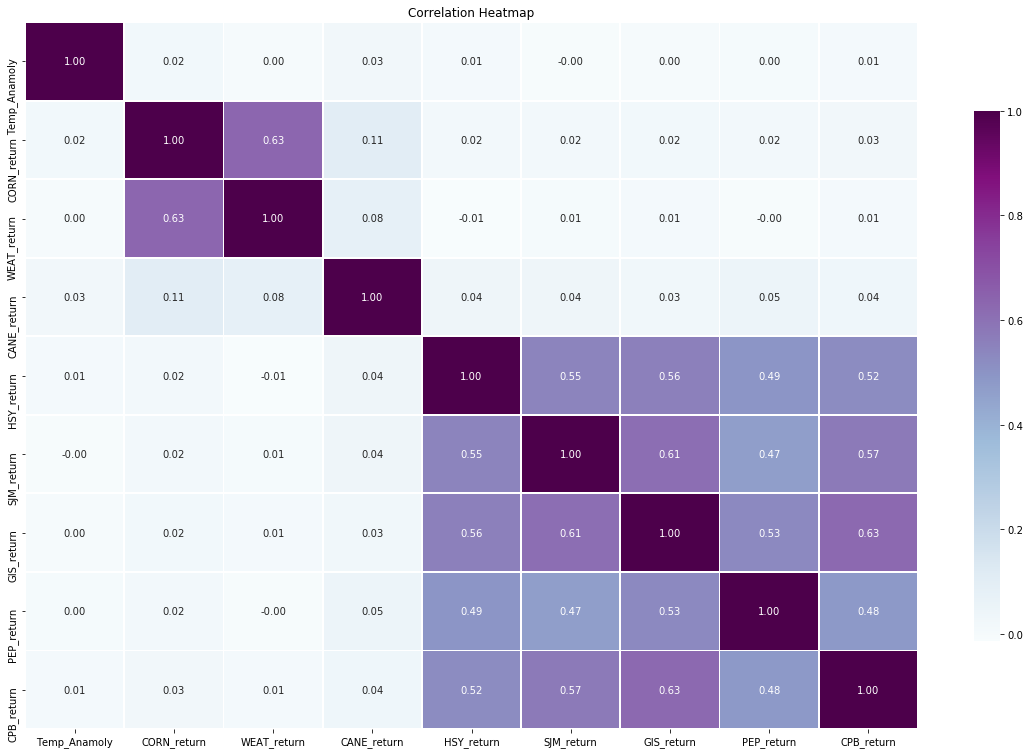

In [5]:
#looking at correlation between return values in stocks
#https://medium.com/business-analysis/stock-market-analysis-project-722520891dce
#no correlation of Temp_Anamoly and stock return

stock_per_change = data[['Temp_Anamoly','CORN_return','WEAT_return','CANE_return','HSY_return','SJM_return','GIS_return','PEP_return','CPB_return']]
plt.figure(figsize = (20,13))

#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method
##Added the annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})

#Created a title
plt.title('Correlation Heatmap')

### Cumulative Returns
- Cumulative return is the return computed relative to the day investment
- If the cumulative return is above one-make a profit

In [6]:
#cumulative daily returns
#https://medium.com/business-analysis/stock-market-analysis-project-722520891dce
#Cumulative return is computed relative to the day investment. 
#If the cumulative return is above one-make a profit--anything else is a loss

data['CORN_cum_return'] = (1 + data['CORN_return']).cumprod()
data['WEAT_cum_return'] = (1 + data['WEAT_return']).cumprod()
data['CANE_cum_return'] = (1 + data['CANE_return']).cumprod()
data['HSY_cum_return'] = (1 + data['HSY_return']).cumprod()
data['SJM_cum_return'] = (1 + data['SJM_return']).cumprod()
data['GIS_cum_return'] = (1 + data['GIS_return']).cumprod()
data['PEP_cum_return'] = (1 + data['PEP_return']).cumprod()
data['CPB_cum_return'] = (1 + data['CPB_return']).cumprod()

#backward fill for the NaN created from first row
data['CORN_cum_return']=data['CORN_cum_return'].fillna(method='bfill')
data['WEAT_cum_return']=data['WEAT_cum_return'].fillna(method='bfill')
data['CANE_cum_return']=data['CANE_cum_return'].fillna(method='bfill')
data['HSY_cum_return']=data['WEAT_cum_return'].fillna(method='bfill')
data['SJM_cum_return']=data['WEAT_cum_return'].fillna(method='bfill')
data['GIS_cum_return']=data['WEAT_cum_return'].fillna(method='bfill')
data['PEP_cum_return']=data['WEAT_cum_return'].fillna(method='bfill')
data['CPB_cum_return']=data['WEAT_cum_return'].fillna(method='bfill')

data.head(5)

,Month,Year,Temp_Anamoly,Avg_Temp_F,Avg_Precip_In,CORN_Open,CORN_High,CORN_Low,CORN_Close,CORN_Volume,...,PEP_return,CPB_return,CORN_cum_return,WEAT_cum_return,CANE_cum_return,HSY_cum_return,SJM_cum_return,GIS_cum_return,PEP_cum_return,CPB_cum_return
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,January,2012,0.5,36.12,2.09,42.73,42.99,42.18,42.62,"114,100",...,-0.011576,-0.011576,0.997419,0.988424,1.021840,0.988424,0.988424,0.988424,0.988424,0.988424
2012-01-04,January,2012,0.5,36.12,2.09,42.79,42.95,42.20,42.51,"43,900",...,-0.011576,-0.011576,0.994845,0.976982,1.044156,0.976982,0.976982,0.976982,0.976982,0.976982
2012-01-05,January,2012,0.5,36.12,2.09,42.25,42.25,41.35,41.51,"87,400",...,-0.021171,-0.021171,0.971442,0.956298,0.980211,0.956298,0.956298,0.956298,0.956298,0.956298
2012-01-06,January,2012,0.5,36.12,2.09,41.72,41.80,41.26,41.35,"31,000",...,-0.006903,-0.006903,0.967698,0.949697,0.980640,0.949697,0.949697,0.949697,0.949697,0.949697
2012-01-09,January,2012,0.5,36.12,2.09,42.05,42.52,41.87,42.19,"153,700",...,0.013438,0.013438,0.987356,0.962459,0.987077,0.962459,0.962459,0.962459,0.962459,0.962459


In [7]:
#fill the NaNs created
#my_series.fillna(method='bfill')

Text(0.5,1,'Correlation Heatmap')

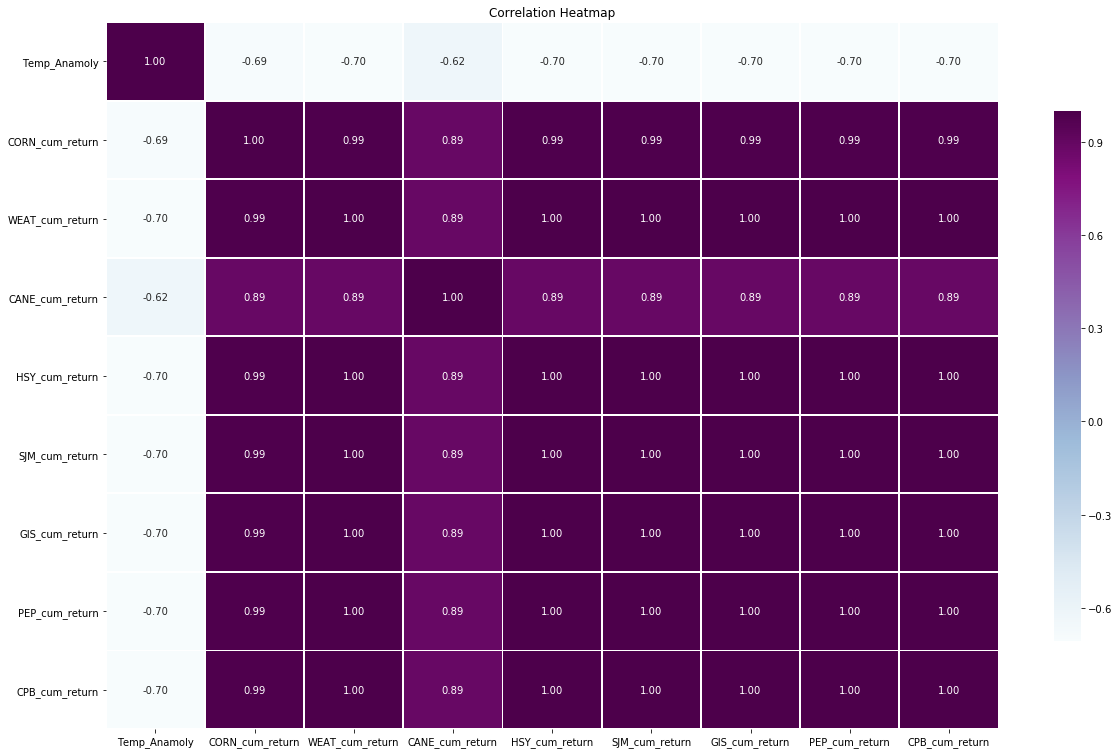

In [8]:
#Correlation with cumulative return
#moderate correlation of Temp_Anamoly with stock cumulative return
#negative for commodity stock
#positive for company stock

stock_per_change = data[['Temp_Anamoly','CORN_cum_return','WEAT_cum_return','CANE_cum_return','HSY_cum_return','SJM_cum_return',
                         'GIS_cum_return','PEP_cum_return','CPB_cum_return']]
plt.figure(figsize = (20,13))

#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method
##Added the annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})

#Created a title
plt.title('Correlation Heatmap')

### Covariance
- https://machinelearningmastery.com/introduction-to-expected-value-variance-and-covariance/
- Measure of the joint probability for two random variables--describes how two variables change together
- The sign of the covariance can be interpreted as whether the two variables increase together (positive) or decrease together (negative). 
- **A covariance value of zero indicates that both variables are completely independent**

In [9]:
#finding the covariance for all stock close features
#Covariance measures for all closing pricing features and Temp_Anamoly
#covariance is above zero for all pairs (per rounding)--supports that variables most likely change together 

a = array(data['Temp_Anamoly'])
b = array(data['CORN_Close'])
c = array(data['WEAT_Close'])
d = array(data['CANE_Close'])
e = array(data['HSY_Close'])
f = array(data['SJM_Close'])
g = array(data['GIS_Close'])
h = array(data['PEP_Close'])
i = array(data['CPB_Close'])

covariance1 = cov(a,b)[0,1]
print('Covariance of Temp_Anamoly and CORN_Close',covariance1)
covariance2 = cov(a,c)[0,1]
print('Covariance of Temp_Anamoly and WEAT_Close',covariance2)
covariance3 = cov(a,d)[0,1]
print('Covariance of Temp_Anamoly and CANE_Close',covariance3)
covariance4 = cov(a,e)[0,1]
print('Covariance of Temp_Anamoly and HSY_Close',covariance4)
covariance5 = cov(a,f)[0,1]
print('Covariance of Temp_Anamoly and SJM_Close',covariance5)
covariance6 = cov(a,g)[0,1]
print('Covariance of Temp_Anamoly and GIS_Close',covariance6)
covariance7 = cov(a,h)[0,1]
print('Covariance of Temp_Anamoly and PEP_Close',covariance7)
covariance8 = cov(a,i)[0,1]
print('Covariance of Temp_Anamoly and CPB_Close',covariance8)

Covariance of Temp_Anamoly and CORN_Close -1.1382527258379114
Covariance of Temp_Anamoly and WEAT_Close -0.6546277128131264
Covariance of Temp_Anamoly and CANE_Close -0.4485527336231245
Covariance of Temp_Anamoly and HSY_Close 1.5061099678903205
Covariance of Temp_Anamoly and SJM_Close 1.7314035378232842
Covariance of Temp_Anamoly and GIS_Close 0.6620507651258039
Covariance of Temp_Anamoly and PEP_Close 1.9498699793284042
Covariance of Temp_Anamoly and CPB_Close 0.7743363558331763


### Granger Causality
- https://www.machinelearningplus.com/time-series/time-series-analysis-python/
- used to determine if one time series will be useful to forecast another

[Reading the test:](https://www.machinelearningplus.com/time-series/time-series-analysis-python/)
- The Null hypothesis is: the series in the second column, does not Granger cause the series in the first. 
- If the P-Values are less than a significance level (0.05) then you reject the null hypothesis and conclude that the said lag of X is indeed useful.

[Test Explained:](https://www.youtube.com/watch?v=ZUv7T8iPGrc)
- y is a function of the lag of x, not x itself

### Null hyp: Stock_Close is not Granger supported by Temp Anamoly
- temp_Anamoly is a predictive factor
- reject null for CORN, WEAT, CANE, and PEP: Stock_Close is granger supported by Temp_Anamoly

In [10]:
#evaluation if the closing price for the stock is supported by Temp_Anamoly through Granger Causality
print('CORN_Close',grangercausalitytests(data[['Temp_Anamoly','CORN_Close']], maxlag=1)) #reject NULL
print('WEAT_Close',grangercausalitytests(data[['Temp_Anamoly','WEAT_Close']], maxlag=1)) #reject NULL
print('CANE_Close',grangercausalitytests(data[['Temp_Anamoly','CANE_Close']], maxlag=1)) #reject NULL
print('HSY_Close',grangercausalitytests(data[['Temp_Anamoly','HSY_Close']], maxlag=1)) #ACCEPT NULL
print('SJM_Close',grangercausalitytests(data[['Temp_Anamoly','SJM_Close']], maxlag=1)) #ACCEPT NULL
print('GIS_Close',grangercausalitytests(data[['Temp_Anamoly','GIS_Close']], maxlag=1)) #ACCEPT NULL
print('PEP_Close',grangercausalitytests(data[['Temp_Anamoly','PEP_Close']], maxlag=1)) #reject NULL
print('CPB_Close',grangercausalitytests(data[['Temp_Anamoly','CPB_Close']], maxlag=1)) #ACCEPT NULL


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.9753  , p=0.0083  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=6.9858  , p=0.0082  , df=1
likelihood ratio test: chi2=6.9737  , p=0.0083  , df=1
parameter F test:         F=6.9753  , p=0.0083  , df_denom=2008, df_num=1
CORN_Close {1: ({'ssr_ftest': (6.975343399559502, 0.008328112039942067, 2008.0, 1), 'ssr_chi2test': (6.98576472933972, 0.008216054030539493, 1), 'lrtest': (6.973659262694127, 0.008271817340070172, 1), 'params_ftest': (6.975343399579382, 0.008328112039850264, 2008.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbbe67a7748>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbbe67a7828>, array([[0., 1., 0.]])])}

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.6656  , p=0.0099  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=6.6755  , p=0.0098  , df=1
likelihood ratio test: chi2=6.6645  , p=0.0

### Null hyp: Stock_return is not granger supported by Temp_Anamoly
- reject null in all cases, except for CANE
- Stock_return is granger supported by Temp_Anamoly

In [12]:
print('CORN_return',grangercausalitytests(data[['Temp_Anamoly','CORN_return']], maxlag=1)) #reject NULL
print('WEAT_return',grangercausalitytests(data[['Temp_Anamoly','WEAT_return']], maxlag=1)) #reject NULL
print('CANE_return',grangercausalitytests(data[['Temp_Anamoly','CANE_return']], maxlag=1)) #ACCEPT NULL
print('HSY_return',grangercausalitytests(data[['Temp_Anamoly','HSY_return']], maxlag=1)) #reject NULL
print('SJM_return',grangercausalitytests(data[['Temp_Anamoly','SJM_return']], maxlag=1)) #reject NULL
print('GIS_return',grangercausalitytests(data[['Temp_Anamoly','GIS_return']], maxlag=1)) #reject NULL
print('PEP_return',grangercausalitytests(data[['Temp_Anamoly','PEP_return']], maxlag=1)) #reject NULL
print('CPB_return',grangercausalitytests(data[['Temp_Anamoly','CPB_return']], maxlag=1)) #reject NULL


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.7551 , p=0.0006  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=11.7726 , p=0.0006  , df=1
likelihood ratio test: chi2=11.7383 , p=0.0006  , df=1
parameter F test:         F=11.7551 , p=0.0006  , df_denom=2008, df_num=1
CORN_return {1: ({'ssr_ftest': (11.755072556627113, 0.0006190237776343311, 2008.0, 1), 'ssr_chi2test': (11.772634916024463, 0.0006010783398844855, 1), 'lrtest': (11.73830960628402, 0.0006122660827273086, 1), 'params_ftest': (11.755072556626965, 0.0006190237776343311, 2008.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbbe67a74a8>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbbe67a77f0>, array([[0., 1., 0.]])])}

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.9786  , p=0.0083  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=6.9891  , p=0.0082  , df=1
likelihood ratio test: chi2=6.9769

### Null hyp: Stock_cum_return is not granger supported by Temp_Anamoly
- reject null in all cases
- Stock_cum_return is granger supported by Temp_Anamoly

In [13]:
print('CORN_cum_return',grangercausalitytests(data[['Temp_Anamoly','CORN_cum_return']], maxlag=1)) #REJECT null
print('WEAT_cum_return',grangercausalitytests(data[['Temp_Anamoly','WEAT_cum_return']], maxlag=1)) #REJECT null
print('CANE_cum_return',grangercausalitytests(data[['Temp_Anamoly','CANE_cum_return']], maxlag=1)) #REJECT null
print('HSY_cum_return',grangercausalitytests(data[['Temp_Anamoly','HSY_cum_return']], maxlag=1)) #REJECT null
print('SJM_cum_return',grangercausalitytests(data[['Temp_Anamoly','SJM_cum_return']], maxlag=1)) #REJECT null
print('GIS_cum_return',grangercausalitytests(data[['Temp_Anamoly','GIS_cum_return']], maxlag=1)) #REJECT null
print('PEP_cum_return',grangercausalitytests(data[['Temp_Anamoly','PEP_cum_return']], maxlag=1)) #REJECT null
print('CPB_cum_return',grangercausalitytests(data[['Temp_Anamoly','CPB_cum_return']], maxlag=1)) #REJECT null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.9753  , p=0.0083  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=6.9858  , p=0.0082  , df=1
likelihood ratio test: chi2=6.9737  , p=0.0083  , df=1
parameter F test:         F=6.9753  , p=0.0083  , df_denom=2008, df_num=1
CORN_cum_return {1: ({'ssr_ftest': (6.975343399559502, 0.008328112039942067, 2008.0, 1), 'ssr_chi2test': (6.98576472933972, 0.008216054030539493, 1), 'lrtest': (6.973659262694127, 0.008271817340070172, 1), 'params_ftest': (6.975343399561037, 0.008328112039934655, 2008.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbbe67a7160>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbbe67a7710>, array([[0., 1., 0.]])])}

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.6656  , p=0.0099  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=6.6755  , p=0.0098  , df=1
likelihood ratio test: chi2=6.6645  , 

### Null hyp: Temp_Anamoly is not granger supported by Stock_Close
- accept null in all cases


In [11]:
print('CORN_Close',grangercausalitytests(data[['CORN_Close','Temp_Anamoly']], maxlag=1)) #ACCEPT NULL
print('WEAT_Close',grangercausalitytests(data[['WEAT_Close','Temp_Anamoly']], maxlag=1)) #ACCEPT NULL
print('CANE_Close',grangercausalitytests(data[['CANE_Close','Temp_Anamoly']], maxlag=1)) #ACCEPT NULL
print('HSY_Close',grangercausalitytests(data[['HSY_Close','Temp_Anamoly']], maxlag=1)) #ACCEPT NULL
print('SJM_Close',grangercausalitytests(data[['SJM_Close','Temp_Anamoly']], maxlag=1)) #ACCEPT NULL
print('GIS_Close',grangercausalitytests(data[['GIS_Close','Temp_Anamoly']], maxlag=1)) #ACCEPT NULL
print('PEP_Close',grangercausalitytests(data[['PEP_Close','Temp_Anamoly']], maxlag=1)) #ACCEPT NULL
print('CPB_Close',grangercausalitytests(data[['CPB_Close','Temp_Anamoly']], maxlag=1)) #ACCEPT NULL


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3508  , p=0.5537  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=0.3513  , p=0.5534  , df=1
likelihood ratio test: chi2=0.3513  , p=0.5534  , df=1
parameter F test:         F=0.3508  , p=0.5537  , df_denom=2008, df_num=1
CORN_Close {1: ({'ssr_ftest': (0.35078628163604325, 0.5537350553023714, 2008.0, 1), 'ssr_chi2test': (0.35131036472613697, 0.5533723000624989, 1), 'lrtest': (0.3512796823310964, 0.5533896253551511, 1), 'params_ftest': (0.35078628163672065, 0.5537350553019935, 2008.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f387cc16d30>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f387cc165c0>, array([[0., 1., 0.]])])}

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8802  , p=0.3483  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=0.8815  , p=0.3478  , df=1
likelihood ratio test: chi2=0.8813  , p=0.3

### Volatility
- can be measured with regards to standard deviation
- using standard deviation, ways to incorporate stdev in investigating volaility: Bollinger Bands, Maximum Drawdown, 

**Factors Effecting Volatility**
- major weather event in area where commodity is produced
- large fluctuations in pricing does not necessarily mean decrease in stock
    - When volatility is high, both in terms of the broad market and in relative terms for a specific stock, traders who are bearish on the stock may buy puts on it based on the twin premises of “buy high, sell higher,” and “the trend is your friend.”

**Standard Deviation**
- use for looking at stock volatility: the stdev indicates how tightly the price of a stock is clustered around the mean or moving average
- [Stock Volatility](https://www.investopedia.com/ask/answers/021015/what-best-measure-given-stocks-volatility.asp): reflection of the degree to which price moves
    - stock with price that fluctuates wildly, hits new highs and lows, or moves erratically is considered highly volatile
    - stock that maintains a relatively stable price has low volatility
    - Larger standard deviations point to higher dispersions of returns as well as greater investment risk
    
- [When you hear that volatility of a stock increased from 20% to 30%, you have no idea whether the stock price actually went up or down. You can just conclude that its moves got bigger and more variable](https://www.macroption.com/price-volatility/)


**Taking StDev on Closing Price**
- HSY has largest standard deviation

In [21]:
#standard deviation on CLOSING PRICE 
#https://www.linkedin.com/pulse/stock-analysis-using-python-tableau-kavin-soni-csm-
print('StDev of CORN_Close', data['CORN_Close'].std())
print('StDev of WEAT_Close', data['WEAT_Close'].std())
print('StDev of CANE_Close', data['CANE_Close'].std())
print('StDev of HSY_Close', data['HSY_Close'].std())
print('StDev of SJM_Close', data['SJM_Close'].std())
print('StDev of GIS_Close', data['GIS_Close'].std())
print('StDev of PEP_Close', data['PEP_Close'].std())

StDev of CORN_Close 10.123039196019285
StDev of WEAT_Close 5.781548873023852
StDev of CANE_Close 4.318318405796824
StDev of HSY_Close 19.279814646539034
StDev of SJM_Close 16.698707603109206
StDev of GIS_Close 7.642143770388628
StDev of PEP_Close 18.703147094504825


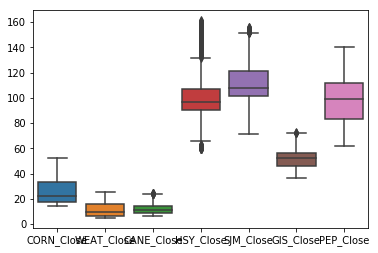

In [22]:
close = data[['CORN_Close','WEAT_Close', 'CANE_Close','HSY_Close', 'SJM_Close', 
               'GIS_Close', 'PEP_Close']]
sns.boxplot(data = close)

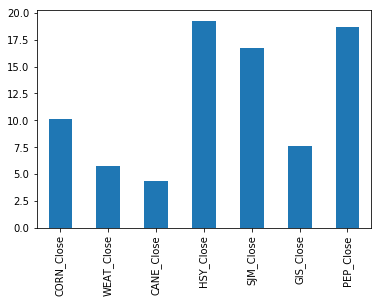

In [23]:
close.std().plot(kind = 'bar')

**Taking StDev on Closing Return**
- CANE has greatest volatility
- may not use

In [13]:
#standard deviation on return 
#https://www.linkedin.com/pulse/stock-analysis-using-python-tableau-kavin-soni-csm-
print('StDev of CORN Return', data['CORN_return'].std())
print('StDev of WEAT Return', data['WEAT_return'].std())
print('StDev of CANE Return', data['CANE_return'].std())
print('StDev of HSY Return', data['HSY_return'].std())
print('StDev of SJM Return', data['SJM_return'].std())
print('StDev of GIS Return', data['GIS_return'].std())
print('StDev of PEP Return', data['PEP_return'].std())

StDev of CORN Return 0.012386117368388409
StDev of WEAT Return 0.015142369731037148
StDev of CANE Return 0.01591488787073109
StDev of HSY Return 0.01131779799426074
StDev of SJM Return 0.012424143567662619
StDev of GIS Return 0.01103849467704541
StDev of PEP Return 0.0086911326586153


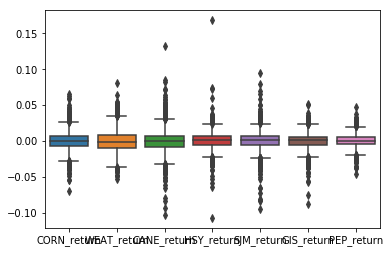

In [14]:
#HSY has greatest outliars for return
returns = data[['CORN_return','WEAT_return', 'CANE_return','HSY_return', 'SJM_return', 
               'GIS_return', 'PEP_return']]
sns.boxplot(data = returns)

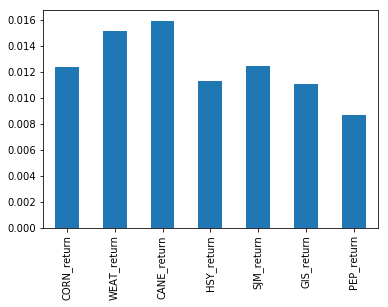

In [15]:
#CANE has greatest volatility
returns.std().plot(kind = 'bar')

[**Bollinger Bands**](https://www.investopedia.com/terms/b/bollingerbands.asp)
- technical indicator to analyze standard deviation over time
- comprised of three lines: the simple moving average (SMA) and two bands placed one standard deviation above and below the SMA
    - SMA is smoothed out version of the stock's price history: slower to respond to changes
- outer bands mirror those changes to reflect the corresponding adjustment to the standard deviation 
- The standard deviation is shown by the width of the Bollinger Bands
    - The wider the Bollinger Bands, the more volatile a stock's price within the given period. 
    - A stock with low volatility has very narrow Bollinger Bands that sit close to the SMA.
    
- [setting up Bollinger Bands](https://medium.com/python-data/setting-up-a-bollinger-band-with-python-28941e2fa300)

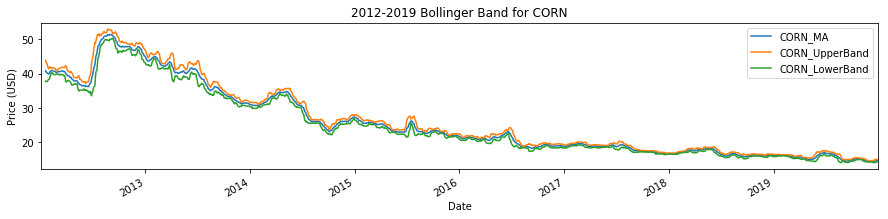

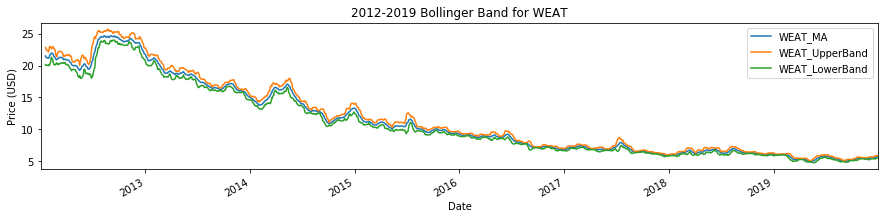

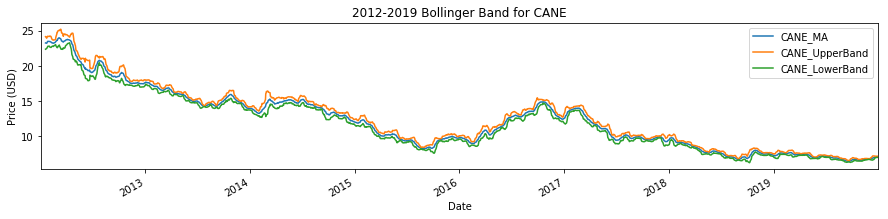

In [16]:
#source: https://medium.com/python-data/setting-up-a-bollinger-band-with-python-28941e2fa300

#set moving average for CORN_Close--LOW VOLATILITY
data['CORN_MA'] = data['CORN_Close'].rolling(12).mean()
#set standard deviation for sample
data['CORN_STD'] = data['CORN_Close'].rolling(12).std() 
#set upper and lower band
data['CORN_UpperBand'] = data['CORN_MA'] + (data['CORN_STD'] * 2)
data['CORN_LowerBand'] = data['CORN_MA'] - (data['CORN_STD'] * 2)
diff_CORN = data['CORN_UpperBand'] - data['CORN_LowerBand']
#Plot Bollinger Band
data[['CORN_MA', 'CORN_UpperBand', 'CORN_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for CORN')
plt.ylabel('Price (USD)')
plt.show()

#WEAT_Close-- LOW VOLATILITY
data['WEAT_MA'] = data['WEAT_Close'].rolling(12).mean()
data['WEAT_STD'] = data['WEAT_Close'].rolling(12).std() 
data['WEAT_UpperBand'] = data['WEAT_MA'] + (data['WEAT_STD'] * 2)
data['WEAT_LowerBand'] = data['WEAT_MA'] - (data['WEAT_STD'] * 2)
diff_WEAT = data['WEAT_UpperBand'] - data['WEAT_LowerBand']
#Plot Bollinger Band
data[['WEAT_MA', 'WEAT_UpperBand', 'WEAT_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for WEAT')
plt.ylabel('Price (USD)')
plt.show()

#CANE_Close-- LOW VOLATILITY
data['CANE_MA'] = data['CANE_Close'].rolling(12).mean()
data['CANE_STD'] = data['CANE_Close'].rolling(12).std() 
data['CANE_UpperBand'] = data['CANE_MA'] + (data['CANE_STD'] * 2)
data['CANE_LowerBand'] = data['CANE_MA'] - (data['CANE_STD'] * 2)
diff_CANE = data['CANE_UpperBand'] - data['CANE_LowerBand']
#Plot Bollinger Band
data[['CANE_MA', 'CANE_UpperBand', 'CANE_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for CANE')
plt.ylabel('Price (USD)')
plt.show()

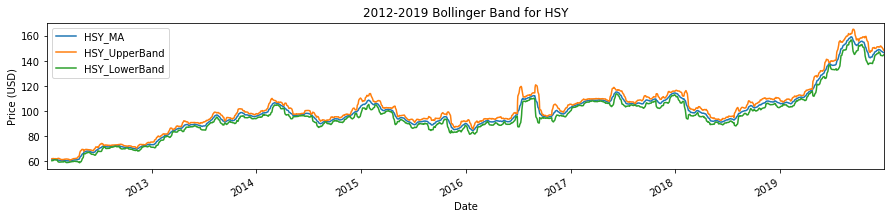

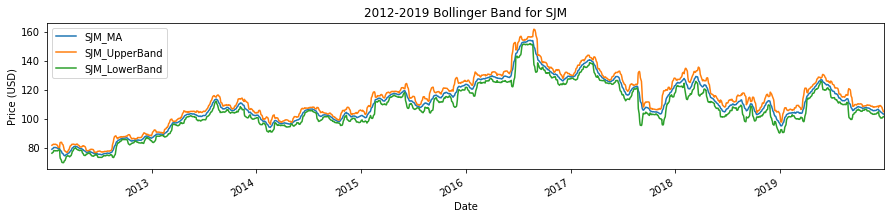

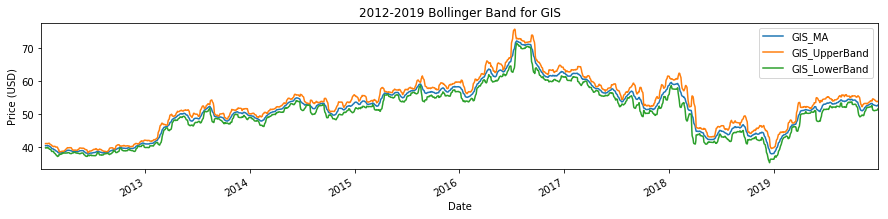

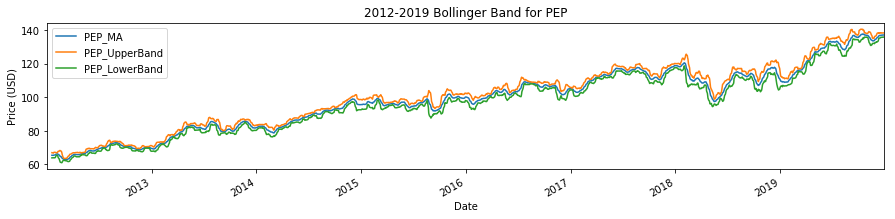

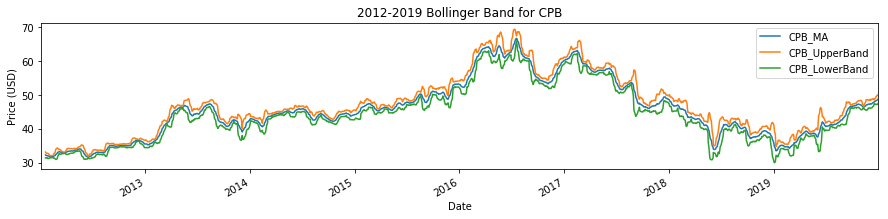

In [17]:
#HSY_Close-- LOW VOLATILITY
data['HSY_MA'] = data['HSY_Close'].rolling(12).mean()
data['HSY_STD'] = data['HSY_Close'].rolling(12).std() 
data['HSY_UpperBand'] = data['HSY_MA'] + (data['HSY_STD'] * 2)
data['HSY_LowerBand'] = data['HSY_MA'] - (data['HSY_STD'] * 2)
diff_HSY = data['HSY_UpperBand'] - data['HSY_LowerBand']
#Plot Bollinger Band
data[['HSY_MA', 'HSY_UpperBand', 'HSY_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for HSY')
plt.ylabel('Price (USD)')
plt.show()

#SJM_Close-- LOW VOLATILITY
data['SJM_MA'] = data['SJM_Close'].rolling(12).mean()
data['SJM_STD'] = data['SJM_Close'].rolling(12).std() 
data['SJM_UpperBand'] = data['SJM_MA'] + (data['SJM_STD'] * 2)
data['SJM_LowerBand'] = data['SJM_MA'] - (data['SJM_STD'] * 2)
diff_SJM = data['SJM_UpperBand'] - data['SJM_LowerBand']
#Plot Bollinger Band
data[['SJM_MA', 'SJM_UpperBand', 'SJM_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for SJM')
plt.ylabel('Price (USD)')
plt.show()

#GIS_Close-- LOW VOLATILITY
data['GIS_MA'] = data['GIS_Close'].rolling(12).mean()
data['GIS_STD'] = data['GIS_Close'].rolling(12).std() 
data['GIS_UpperBand'] = data['GIS_MA'] + (data['GIS_STD'] * 2)
data['GIS_LowerBand'] = data['GIS_MA'] - (data['GIS_STD'] * 2)
diff_GIS = data['GIS_UpperBand'] - data['GIS_LowerBand']
#Plot Bollinger Band
data[['GIS_MA', 'GIS_UpperBand', 'GIS_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for GIS')
plt.ylabel('Price (USD)')
plt.show()

#PEP_Close-- LOW VOLATILITY
data['PEP_MA'] = data['PEP_Close'].rolling(12).mean()
data['PEP_STD'] = data['PEP_Close'].rolling(12).std() 
data['PEP_UpperBand'] = data['PEP_MA'] + (data['PEP_STD'] * 2)
data['PEP_LowerBand'] = data['PEP_MA'] - (data['PEP_STD'] * 2)
diff_PEP = data['PEP_UpperBand'] - data['PEP_LowerBand']
#Plot Bollinger Band
data[['PEP_MA', 'PEP_UpperBand', 'PEP_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for PEP')
plt.ylabel('Price (USD)')
plt.show()

#CPB_Close-- LOW VOLATILITY
data['CPB_MA'] = data['CPB_Close'].rolling(12).mean()
data['CPB_STD'] = data['CPB_Close'].rolling(12).std() 
data['CPB_UpperBand'] = data['CPB_MA'] + (data['CPB_STD'] * 2)
data['CPB_LowerBand'] = data['CPB_MA'] - (data['CPB_STD'] * 2)
diff_CPB = data['CPB_UpperBand'] - data['CPB_LowerBand']
#Plot Bollinger Band
data[['CPB_MA', 'CPB_UpperBand', 'CPB_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for CPB')
plt.ylabel('Price (USD)')
plt.show()

In [18]:
#Looking to find the max width in the Bollinger Band and where that max is in dataset
print('Max Bollinger Band width for CORN', diff_CORN.max())
print (diff_CORN.idxmax())
print('Max Bollinger Band width for WEAT', diff_WEAT.max())
print (diff_WEAT.idxmax())
print('Max Bollinger Band width for CANE', diff_CANE.max())
print (diff_CANE.idxmax())
print('Max Bollinger Band width for HSY', diff_HSY.max())
print (diff_HSY.idxmax())
print('Max Bollinger Band width for SJM', diff_SJM.max())
print (diff_SJM.idxmax())
print('Max Bollinger Band width for GIS', diff_GIS.max())
print (diff_GIS.idxmax())
print('Max Bollinger Band width for PEP', diff_PEP.max())
print (diff_PEP.idxmax())
print('Max Bollinger Band width for CPB', diff_CPB.max())
print (diff_CPB.idxmax())

Max Bollinger Band width for CORN 12.31873812900119
2012-07-09 00:00:00
Max Bollinger Band width for WEAT 5.028105251905735
2012-07-05 00:00:00
Max Bollinger Band width for CANE 3.5262135241902186
2012-04-24 00:00:00
Max Bollinger Band width for HSY 29.217306618862892
2016-07-08 00:00:00
Max Bollinger Band width for SJM 34.057422454472345
2017-08-31 00:00:00
Max Bollinger Band width for GIS 12.914008837014492
2018-03-28 00:00:00
Max Bollinger Band width for PEP 16.778171605518622
2018-02-12 00:00:00
Max Bollinger Band width for CPB 12.690044296314525
2018-05-24 00:00:00


In [20]:
print('Average Bollinger Band width for CORN', diff_CORN.mean())
print('Average Bollinger Band width for WEAT', diff_WEAT.mean())
print('Average Bollinger Band width for CANE', diff_CANE.mean())
print('Average Bollinger Band width for HSY', diff_HSY.mean())
print('Average Bollinger Band width for SJM', diff_SJM.mean())
print('Average Bollinger Band width for GIS', diff_GIS.mean())
print('Average Bollinger Band width for PEP', diff_PEP.mean())
print('Average Bollinger Band width for CPB', diff_CPB.mean())

Average Bollinger Band width for CORN 1.6672275566225716
Average Bollinger Band width for WEAT 0.9025873581058785
Average Bollinger Band width for CANE 0.8822487753685238
Average Bollinger Band width for HSY 5.346981435583102
Average Bollinger Band width for SJM 6.630216905256271
Average Bollinger Band width for GIS 2.8265551793808887
Average Bollinger Band width for PEP 4.329263187958113
Average Bollinger Band width for CPB 2.9174703691846084


[**Maximum Drawdown (MDD)**](https://www.investopedia.com/terms/m/maximum-drawdown-mdd.asp)
- Another way of dealing with volatility is to find the maximum drawdown
- the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained
- Maximum drawdown is an indicator of downside risk over a specified time period
- expressed in percentage terms
- does loss just continue to increase???

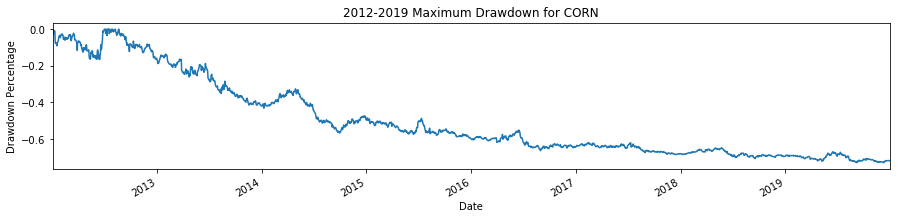

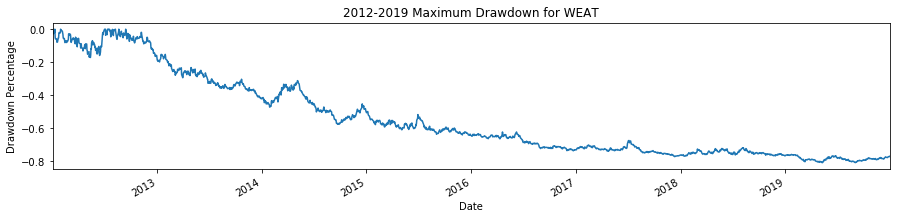

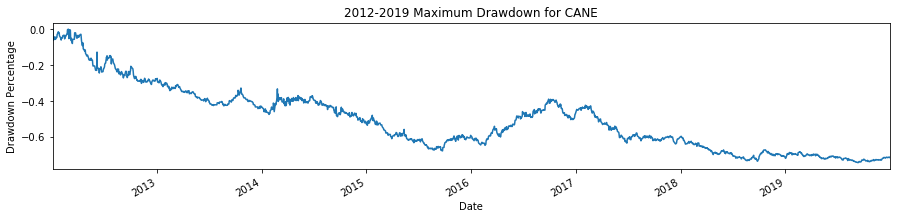

In [15]:
#take the stock cumulative return and put into formula with maximum cumulative return
#https://seekingalpha.com/instablog/42079636-kayode-omotosho/5377452-computing-maximum-drawdown-of-stocks-in-python
#CORN_Close Max Drawdown
CORN_CumMax = data['CORN_cum_return'].cummax()
data['CORN_MaxDrawdown'] = ((data['CORN_cum_return']) - CORN_CumMax)/CORN_CumMax
data['CORN_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for CORN')
plt.ylabel('Drawdown Percentage')
plt.show()

#WEAT_Close Max Drawdown--GREATEST DRAWDOWN
WEAT_CumMax = data['WEAT_cum_return'].cummax()
data['WEAT_MaxDrawdown'] = ((data['WEAT_cum_return']) - WEAT_CumMax)/WEAT_CumMax
data['WEAT_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for WEAT')
plt.ylabel('Drawdown Percentage')
plt.show()

#CANE_Close Max Drawdown
CANE_CumMax = data['CANE_cum_return'].cummax()
data['CANE_MaxDrawdown'] = ((data['CANE_cum_return']) - CANE_CumMax)/CANE_CumMax
data['CANE_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for CANE')
plt.ylabel('Drawdown Percentage')
plt.show()

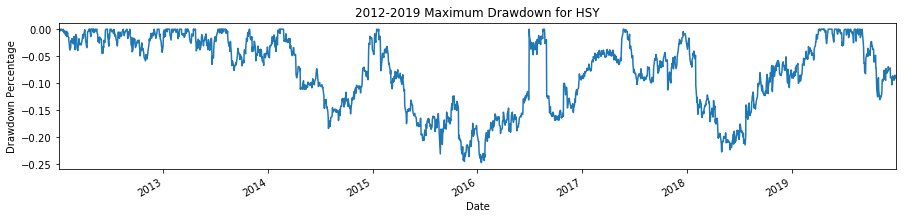

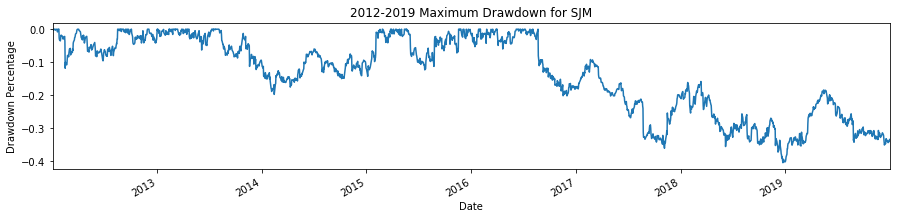

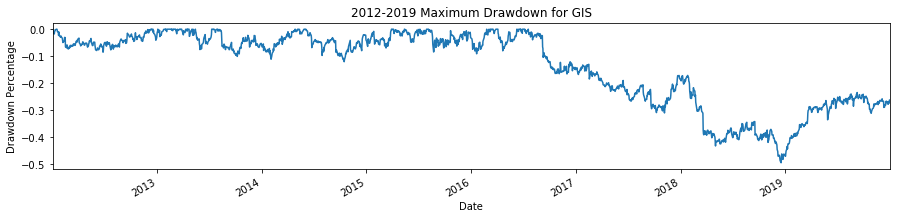

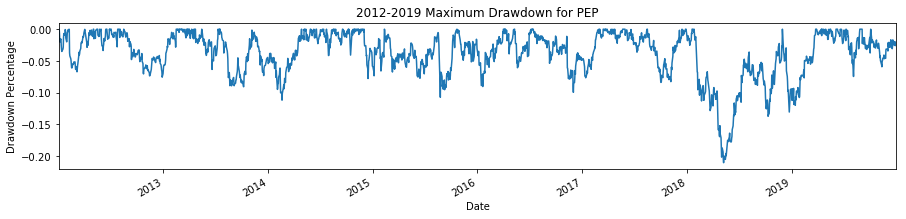

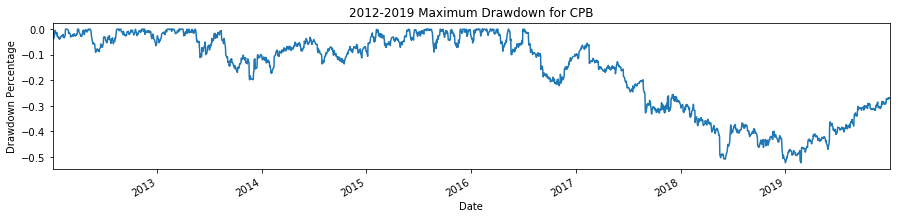

In [16]:
#HSY_Close Max Drawdown
HSY_CumMax = data['HSY_cum_return'].cummax()
data['HSY_MaxDrawdown'] = ((data['HSY_cum_return']) - HSY_CumMax)/HSY_CumMax
data['HSY_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for HSY')
plt.ylabel('Drawdown Percentage')
plt.show()

#SJM_Close Max Drawdown
SJM_CumMax = data['SJM_cum_return'].cummax()
data['SJM_MaxDrawdown'] = ((data['SJM_cum_return']) - SJM_CumMax)/SJM_CumMax
data['SJM_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for SJM')
plt.ylabel('Drawdown Percentage')
plt.show()

#GIS_Close Max Drawdown--BIG DRAWDOWN
GIS_CumMax = data['GIS_cum_return'].cummax()
data['GIS_MaxDrawdown'] = ((data['GIS_cum_return']) - GIS_CumMax)/GIS_CumMax
data['GIS_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for GIS')
plt.ylabel('Drawdown Percentage')
plt.show()

#PEP_Close Max Drawdown
PEP_CumMax = data['PEP_cum_return'].cummax()
data['PEP_MaxDrawdown'] = ((data['PEP_cum_return']) - PEP_CumMax)/PEP_CumMax
data['PEP_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for PEP')
plt.ylabel('Drawdown Percentage')
plt.show()

#CPB_Close Max Drawdown--BIG DRAWDOWN
CPB_CumMax = data['CPB_cum_return'].cummax()
data['CPB_MaxDrawdown'] = ((data['CPB_cum_return']) - CPB_CumMax)/CPB_CumMax
data['CPB_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for CPB')
plt.ylabel('Drawdown Percentage')
plt.show()


In [17]:
#Save new dataset to csv
data.to_csv('CapstoneCalculatedData.csv')